## ImageDataGenerator

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

# ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential
from keras.models import Model

from keras.layers import Dropout, Flatten, Dense, Conv2D, Input
from keras.layers import GlobalAveragePooling2D, MaxPooling2D, GlobalMaxPooling2D

from sklearn.metrics import confusion_matrix

In [2]:
path = "cats_and_dogs/"
training_data_dir = path + "train" 
validation_data_dir = path + "validation" 
test_data_dir = path + "test" 

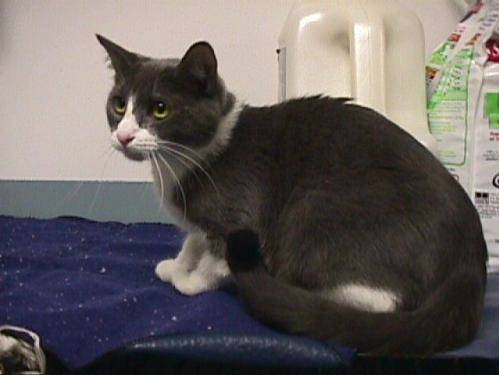

In [5]:
img = Image.open("cats_and_dogs/train/cats/cat.4.jpg")
img

In [6]:
# Preprocesamos la imagen, para poder usar ImageDataGenerator la imagen debe de tener 4 dimensiones

img = np.asarray(img)
print(img.shape)

img = img / 255
print(img.shape)

h_dim = np.shape(img)[0]
w_dim = np.shape(img)[1]
num_channel = np.shape(img)[2]

img = img.reshape(1, h_dim, w_dim, num_channel)
print(img.shape)

(375, 499, 3)
(375, 499, 3)
(1, 375, 499, 3)


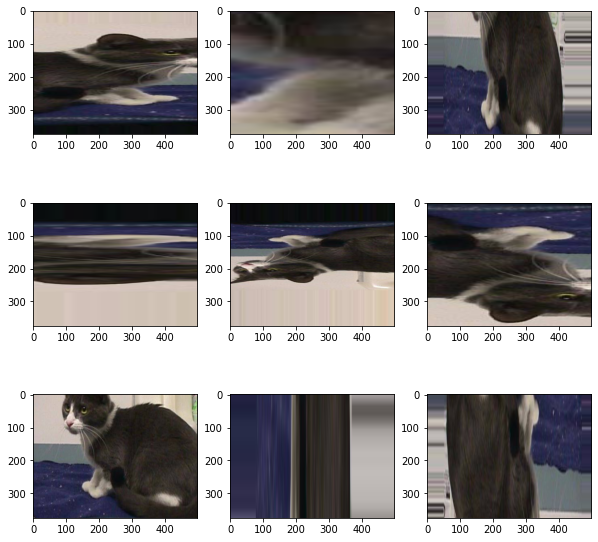

In [7]:
# ImageDataGenerator nos genera imagenes del gato editado 9 veces de diferente forma

batch_size = 9

# Inicializamos ImageDataGenerator
data_gen = ImageDataGenerator(rotation_range = 0,
                              shear_range = 0,
                              zoom_range = 1,
                              horizontal_flip = True,
                              vertical_flip = True,
                              preprocessing_function = None)
# Entrenamos
data_gen.fit(img)

plt.figure(figsize = (10, 10)) 

for x, img_batch in enumerate(data_gen.flow(img, batch_size = 9)):
    for img in img_batch:
        plt.subplot(330 + 1 + x)
        plt.imshow(img)
        x += 1    
    if x >= batch_size:
        break
        
plt.show()

#### Vamos a hacer esto con todas las imagenes del fichero.

In [8]:
# Inicializamos los ImageDataGenerator

training_data_generator = ImageDataGenerator(rescale = 1./255,
                                             zoom_range = 1,
                                             horizontal_flip = True,
                                             vertical_flip = True)

validation_data_generator = ImageDataGenerator(rescale = 1./255,
                                               zoom_range = 1,
                                               horizontal_flip = True,
                                               vertical_flip = True)

test_data_generator = ImageDataGenerator(rescale = 1./255,
                                         zoom_range = 1,
                                         horizontal_flip = True,
                                         vertical_flip = True)

In [9]:
# Entrenamos los ImageDataGenerator

# Para poder usar .flow_from_directory(), necesitamos tener las carpetas ordenadas, es decir:

# una carpeta de train con una carpeta de imagenes para cada clase
# una carpeta de validation con una carpeta de imagenes para cada clase
# y una carpeta de test con una carpeta de imagenes para cada clase

size = 200

training_generator = training_data_generator.flow_from_directory(training_data_dir,
                                                                 target_size = (size, size),
                                                                 batch_size = 30,
                                                                 class_mode = "binary")

validation_generator = validation_data_generator.flow_from_directory(validation_data_dir,
                                                                     target_size = (size, size),
                                                                     batch_size = 1,
                                                                     class_mode = "binary")

test_generator = test_data_generator.flow_from_directory(test_data_dir,
                                                         target_size = (size, size),
                                                         batch_size = 1,
                                                         class_mode = "binary")

# En caso de que la clasificación sea multi-clase, el cambiamos el parámetro class_mode = "categorical"

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [10]:
model = Sequential()

model.add(Input(shape = (size, size, 3)))

model.add(Conv2D(filters = 16, kernel_size = 9, padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size = 2))

model.add(Conv2D(filters = 16, kernel_size = 9, padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size = 2))

model.add(Flatten())

model.add(Dense(units = 120, activation = "relu"))
model.add(Dropout(0.15))
model.add(Dense(units = 1, activation = "sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 16)      3904      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 16)      20752     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 50, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 40000)             0         
                                                                 
 dense (Dense)               (None, 120)               4

In [11]:
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

history = model.fit(training_generator, epochs = 10, validation_data = validation_generator)

Epoch 1/10
 9/67 [===>..........................] - ETA: 2:36 - loss: 0.9544 - accuracy: 0.5185

KeyboardInterrupt: 

In [ ]:
def plot_history(history):
    
    accuracy     = history.history["accuracy"]
    loss         = history.history["loss"]

    val_accuracy = history.history["val_accuracy"]
    val_loss     = history.history["val_loss"]

    epochs = range(1, len(accuracy) + 1)

    # Plot Accuracy
    plt.plot(epochs,     accuracy, "r--", label = "Train accuracy")
    plt.plot(epochs, val_accuracy,  "b", label = "Validation accuracy")
    
    plt.title("Training and validation accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()
    
    plt.show()

    # Plot Loss
    plt.plot(epochs, loss, "r--", label = "Train loss" )
    plt.plot(epochs, val_loss ,  "b", label = "Validation loss" )
    
    plt.title("Training and validation loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")
    plt.legend()

    plt.show()

In [ ]:
plot_history(history)

test_loss, test_accuracy = model.evaluate(test_generator, verbose = 2)
print ("Test Accuracy:", test_accuracy)

In [ ]:
y_hat = model.predict(test_generator)

y_hat

In [ ]:
y_test = test_generator.labels

y_test

In [ ]:
thresh = 0.5

y_hat = [0 if pred < thresh else 1 for pred in y_hat]

y_hat

In [ ]:
confusion_matrix(y_test, y_hat)

In [ ]:
# Testing
probabilities = model.predict(test_generator, 10)

for index, probability in enumerate(probabilities):
    
    image_path = test_data_dir + "/" + test_generator.filenames[index]
    img = plt.imread(image_path)
    plt.imshow(img)
    
    if probability > 0.5:
        plt.title(f"Proba: {1 - probability[0] : ,.3f} dog")
        
    else:
        plt.title(f"Proba: {1 - probability[0] : ,.3f} cat")
    plt.show()


In [ ]:
model.save_weights("red_neuronal_entrenada_cats_dogs.h5")

In [ ]:
################################################################################################################################